In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# In order to see all of the columns of the dataset we need to set the display options
# from the Pandas package to at least 100 (the dataset has 96 columns) and, for the rows,
# I set it to at least 100 which will help when I check for null values and dtypes.

pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)

In [0]:
# Importing the CSV 'listings_summary.csv' from the Kaggle dataset found at this
# URL: https://www.kaggle.com/brittabettendorf/berlin-airbnb-data

listings_summary = pd.read_csv('https://raw.githubusercontent.com/BuildWeekAirbnbOptimal2/Datascience/master/Berlin.csv')

In [4]:
# As stated above, there are 96 columns and over 20,000 observations

listings_summary.shape

(22552, 96)

In [5]:
# Checking the dtypes of the dataset...

# The goal of this project is to find the optimal price for an AirBnB in Belin, Germany so,
# the target variable will be the 'price' which is currently an object and therefore, will
# have to be dealt with appropriately.

listings_summary.dtypes

id                                    int64
listing_url                          object
scrape_id                             int64
last_scraped                         object
name                                 object
summary                              object
space                                object
description                          object
experiences_offered                  object
neighborhood_overview                object
notes                                object
transit                              object
access                               object
interaction                          object
house_rules                          object
thumbnail_url                       float64
medium_url                          float64
picture_url                          object
xl_picture_url                      float64
host_id                               int64
host_url                             object
host_name                            object
host_since                      

In [6]:
# Next we will check for the null values within the dataset - there are quite a few...

listings_summary.isna().sum()

id                                      0
listing_url                             0
scrape_id                               0
last_scraped                            0
name                                   59
summary                               963
space                                8532
description                           203
experiences_offered                     0
neighborhood_overview               11012
notes                               15337
transit                              9516
access                              11715
interaction                         12146
house_rules                         11103
thumbnail_url                       22552
medium_url                          22552
picture_url                             0
xl_picture_url                      22552
host_id                                 0
host_url                                0
host_name                              26
host_since                             26
host_location                     

In [7]:
# Calling the head of the dataset to visualize what the first row of observations looks like

listings_summary.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [0]:
# We can already tell later on we will have to drop a few columns where the cardinality for some
# object features, while finite, will be very high epecially in the case of URLs, names, reviews,
# descriptions, etc. so we will remove a few of them now and possibly later.

In [9]:
# First, we will use a for loop to check the number of unique values in each column.  This is acheived
# by taking the length of the value_counts of a column.

for col in listings_summary:
    print(f'There are/is {len(listings_summary[col].value_counts())} unique value(s) for column: {col}') if listings_summary[col].dtypes=='O' else print(None)

None
There are/is 22552 unique value(s) for column: listing_url
None
There are/is 2 unique value(s) for column: last_scraped
There are/is 21873 unique value(s) for column: name
There are/is 21041 unique value(s) for column: summary
There are/is 13598 unique value(s) for column: space
There are/is 21997 unique value(s) for column: description
There are/is 1 unique value(s) for column: experiences_offered
There are/is 10781 unique value(s) for column: neighborhood_overview
There are/is 6687 unique value(s) for column: notes
There are/is 12308 unique value(s) for column: transit
There are/is 9946 unique value(s) for column: access
There are/is 9584 unique value(s) for column: interaction
There are/is 10350 unique value(s) for column: house_rules
None
None
There are/is 22465 unique value(s) for column: picture_url
None
None
There are/is 19180 unique value(s) for column: host_url
There are/is 5997 unique value(s) for column: host_name
There are/is 2914 unique value(s) for column: host_since

In [10]:
listings_summary.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,2015,https://www.airbnb.com/rooms/2015,20181107122246,2018-11-07,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,none,It is located in the former East Berlin area o...,"This is my home, not a hotel. I rent out occas...","Close to U-Bahn U8 and U2 (metro), Trams M12, ...","Simple kitchen/cooking, refrigerator, microwav...",Always available,"No parties No events No pets No smoking, not e...",NaN,NaN,https://a0.muscache.com/im/pictures/260fd609-7...,NaN,2217,https://www.airbnb.com/users/show/2217,Ian,2008-08-18,"Key Biscayne, Florida, United States",Believe in sharing economy.,within an hour,96%,NaN,t,https://a0.muscache.com/im/pictures/21428a22-4...,https://a0.muscache.com/im/pictures/21428a22-4...,Mitte,4.0,4.0,"['email', 'phone', 'reviews', 'jumio', 'offlin...",t,t,"Berlin, Berlin, Germany",Mitte,Brunnenstr. Süd,Mitte,Berlin,Berlin,10119,Berlin,"Berlin, Germany",DE,Germany,52.534537,13.402557,f,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",NaN,$60.00,NaN,NaN,$200.00,$30.00,1,$28.00,4,1125,3 months ago,t,0,21,51,141,2018-11-07,118,2016-04-11,2018-10-28,93.0,10.0,9.0,10.0,10.0,10.0,9.0,t,NaN,NaN,f,f,strict_14_with_grace_period,f,f,4,3.76


In [0]:
# The first thing we will do is remove the object columns with high cardinality and features that are probably
# redundant like 'city' since this is the Berlin AirBnB dataset - 'zipcode' may be useful but neighbourhood could
# cover that.

high_cardin = ['listing_url', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview',
               'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url',
               'picture_url', 'xl_picture_url', 'host_url', 'host_name', 'host_about', 'host_thumbnail_url',
               'host_picture_url', 'host_verifications', 'street', 'city', 'state', 'zipcode', 'market',
               'smart_location', 'country_code', 'country', 'bed_type', 'amenities', 'weekly_price', 'monthly_price',
               'has_availability', 'calendar_last_scraped', 'requires_license', 'license', 'is_business_travel_ready',
               'require_guest_profile_picture', 'require_guest_phone_verification']

In [0]:
listings_df = listings_summary.drop(columns=high_cardin)

In [13]:
listings_df.isna().sum()

id                                    0
scrape_id                             0
last_scraped                          0
host_id                               0
host_since                           26
host_location                       116
host_response_time                12894
host_response_rate                12895
host_acceptance_rate              22552
host_is_superhost                    26
host_neighbourhood                 5094
host_listings_count                  26
host_total_listings_count            26
host_has_profile_pic                 26
host_identity_verified               26
neighbourhood                      1131
neighbourhood_cleansed                0
neighbourhood_group_cleansed          0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         0
room_type                             0
accommodates                          0
bathrooms                            32


In [0]:
# We will also remove columns that have many NaN values

high_na = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'square_feet', 'jurisdiction_names']

Berlin_airbnb = listings_df.drop(columns=high_na)

In [15]:
Berlin_airbnb.dtypes

id                                  int64
scrape_id                           int64
last_scraped                       object
host_id                             int64
host_since                         object
host_location                      object
host_is_superhost                  object
host_neighbourhood                 object
host_listings_count               float64
host_total_listings_count         float64
host_has_profile_pic               object
host_identity_verified             object
neighbourhood                      object
neighbourhood_cleansed             object
neighbourhood_group_cleansed       object
latitude                          float64
longitude                         float64
is_location_exact                  object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              

In [0]:
# Next we will engineer some features based on the data

In [0]:
# Originally, the 'security_deposit' column would've been kept and replaced NaN values with the mean but,
# Since there are many NaN values we will make a binary feature stating '1' if they require a security deposit
# and '0' if the do not require one.


# TODO: drop Berlin_airbnb['security_deposit']
has_security_dep = []
for i in Berlin_airbnb['security_deposit']:
    if i==np.NaN:
        has_security_dep.append(0)
    else:
        has_security_dep.append(1)
Berlin_airbnb['require_security_deposit'] = np.array(has_security_dep).astype(int)

In [0]:
# We will do the same with cleaning fee and call it 'has_cleaning_service'...

# TODO: drop Berlin_airbnb['cleaning_fee']
has_cleaning = []
for i in Berlin_airbnb['cleaning_fee']:
    if i==np.NaN:
        has_cleaning.append(0)
    else:
        has_cleaning.append(1)
Berlin_airbnb['has_cleaning_service'] = np.array(has_cleaning).astype(int)

In [0]:
# Possible columns to impute or use for feature engineering

# review_scores_rating - mode = 100.00 (46 unique values between 50.00 and 100.00)
# review_scores_accuracy - mode = 10.0 (more than 50% of the data)
# review_scores_cleanliness - mode = 10.0
# review_scores_checkin - mode = 10.0 (more than 50% of the data)
# review_scores_communication - mode = 10.0 (more than 50% of the data)
# review_scores_location - mode = 10.0
# review_scores_value - mode = 10.0

In [20]:
# Next, we will get rid of the dollar signs and any commas that may be contained in the 'price'
# and 'extra_people' column by making a function that will strip the dollar sign ('$') from the
# array, remove the redundant '.00', and then remove commas for amounts 1000 or larger

def dollar_to_int(row):
    return row.strip('$')[:-3]
def no_comma(row):
    return row.replace(',','')

# To show it works...

amount = dollar_to_int('$1,300.00')
print(no_comma(amount))

1300


In [0]:
# Applying them to the dataset...

Berlin_airbnb['price'] = Berlin_airbnb['price'].apply(dollar_to_int).apply(no_comma).astype(int)
Berlin_airbnb['extra_people'] = Berlin_airbnb['extra_people'].apply(dollar_to_int).apply(no_comma).astype(int)

In [22]:
Berlin_airbnb.shape

(22552, 52)

In [0]:
Berlin_airbnb = Berlin_airbnb.drop(columns=['security_deposit', 'cleaning_fee'])

In [0]:
# 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','price','number_of_reviews',('review_scores_value '),'instant_bookable','cancellation_policy','neighbourhood','host_identity_verified'

In [0]:
# Possibly useful: - Predicting 'PRICE'
# 1. neighbourhood
# 2. property type
# 3. room type
# 4. accommodates
# 5. bathrooms
# 6. bedrooms
# 7. beds
# 8. reviews_scores_value
# 9. instant_bookable
# 10. cancellation_policy
# 10. has_cleaning_service

### Columns we may go with
# 'property_type', 'room_type', 'accommodates','bathrooms', 'bedrooms', 'beds', 'bed_type','price','number_of_reviews',('review_scores_value '),'instant_bookable','cancellation_policy','neighbourhood','host_identity_verified'

In [26]:
Berlin_subset = Berlin_airbnb[['property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds',
                               'price', 'number_of_reviews', 'review_scores_value', 'instant_bookable',
                               'cancellation_policy', 'neighbourhood', 'host_identity_verified']]
Berlin_subset.head()

,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,number_of_reviews,review_scores_value,instant_bookable,cancellation_policy,neighbourhood,host_identity_verified
0,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,60,118,9.0,f,strict_14_with_grace_period,Mitte,t
1,Apartment,Private room,2,1.0,1.0,1.0,17,6,10.0,f,flexible,NaN,t
2,Apartment,Entire home/apt,4,1.0,1.0,2.0,90,143,9.0,t,strict_14_with_grace_period,Prenzlauer Berg,t
3,Apartment,Private room,2,1.0,1.0,1.0,26,25,9.0,f,strict_14_with_grace_period,Schöneberg,t
4,Apartment,Private room,2,1.0,1.0,2.0,42,197,9.0,f,moderate,Prenzlauer Berg,t


In [0]:
###### We need to include why we are using these columns!! ######

# i.e. Why we chose to condense 'accommodates'

In [28]:
Berlin_subset.dtypes

property_type              object
room_type                  object
accommodates                int64
bathrooms                 float64
bedrooms                  float64
beds                      float64
price                       int64
number_of_reviews           int64
review_scores_value       float64
instant_bookable           object
cancellation_policy        object
neighbourhood              object
host_identity_verified     object
dtype: object

In [29]:
Berlin_subset['accommodates'].value_counts()

2     12228
4      3216
1      2734
3      2487
6       733
5       701
8       151
7       131
10       57
9        36
12       24
16       20
11       15
14       11
15        6
13        2
Name: accommodates, dtype: int64

In [30]:
# Minimizing the values for the accommodates column
# We will make them objects from 1-6 and then 7+

accommodate = []
for int in Berlin_subset['accommodates']:
    if int==1:
        accommodate.append('1')
    elif int==2:
        accommodate.append('2')
    elif int==3:
        accommodate.append('3')
    elif int==4:
        accommodate.append('4')
    elif int==5:
        accommodate.append('5')
    elif int==6:
        accommodate.append('6')
    elif int>=7:
        accommodate.append('7+')
    else:
        accommodate.append('')
set(accommodate)

{'1', '2', '3', '4', '5', '6', '7+'}

In [31]:
len(Berlin_subset['accommodates'])==len(accommodate)

True

In [32]:
Berlin_subset['can_accommodate'] = np.array(accommodate)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [33]:
bedrooms = []
for bed in Berlin_subset['bedrooms']:
    if bed==1.0:
        bedrooms.append('1')
    else:
        bedrooms.append('2+')
set(bedrooms)

{'1', '2+'}

In [34]:
Berlin_subset['n_bedrooms'] = np.array(bedrooms)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [35]:
bathrooms = []
for bath in Berlin_subset['bathrooms']:
    if bath==1.0:
        bathrooms.append('1')
    else:
        bathrooms.append('2+')
set(bathrooms)

{'1', '2+'}

In [36]:
Berlin_subset['n_bathrooms'] = np.array(bathrooms)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [37]:
beds = []
for bed in Berlin_subset['beds']:
    if bed==1.0:
        beds.append('1')
    else:
        beds.append('2+')
set(beds)

{'1', '2+'}

In [38]:
Berlin_subset['n_beds'] = np.array(beds)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
def to_nbool(array):
    for i in array:
        if i=='t':
            return 1
        else:
            return 0

In [40]:
Berlin_subset['host_identity_verified'] = Berlin_subset['host_identity_verified'].dropna().apply(to_nbool)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
Berlin_subset['instant_bookable'] = Berlin_subset['instant_bookable'].dropna().apply(to_nbool)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [42]:
Berlin_subset['review_scores_value'] = Berlin_subset['review_scores_value'].replace(np.NaN, 0)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
scores = []
for rating in Berlin_subset['review_scores_value']:
    if rating>=7.0:
        scores.append(rating)
    else:
        scores.append(0.0)
set(scores)

{0.0, 7.0, 8.0, 9.0, 10.0}

In [44]:
Berlin_subset['review_score'] = scores

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
Berlin = Berlin_subset.drop(columns=['accommodates', 'bathrooms', 'bedrooms',
                                    'beds', 'review_scores_value'])

In [46]:
Berlin.shape

(22552, 13)

In [47]:
Berlin.head()

,property_type,room_type,price,number_of_reviews,instant_bookable,cancellation_policy,neighbourhood,host_identity_verified,can_accommodate,n_bedrooms,n_bathrooms,n_beds,review_score
0,Guesthouse,Entire home/apt,60,118,0,strict_14_with_grace_period,Mitte,1.0,3,1,1,2+,9.0
1,Apartment,Private room,17,6,0,flexible,NaN,1.0,2,1,1,1,10.0
2,Apartment,Entire home/apt,90,143,1,strict_14_with_grace_period,Prenzlauer Berg,1.0,4,1,1,2+,9.0
3,Apartment,Private room,26,25,0,strict_14_with_grace_period,Schöneberg,1.0,2,1,1,1,9.0
4,Apartment,Private room,42,197,0,moderate,Prenzlauer Berg,1.0,2,1,1,2+,9.0


In [48]:
len(Berlin.columns)

13

In [49]:
Berlin.isnull().sum()

property_type                0
room_type                    0
price                        0
number_of_reviews            0
instant_bookable             0
cancellation_policy          0
neighbourhood             1131
host_identity_verified      26
can_accommodate              0
n_bedrooms                   0
n_bathrooms                  0
n_beds                       0
review_score                 0
dtype: int64

In [50]:
#stripping NaN values
berlin_na_stripped = Berlin[Berlin['neighbourhood'].notna() & Berlin['host_identity_verified'].notna()]
berlin_na_stripped.shape


(21395, 13)

In [0]:
Berlin = berlin_na_stripped

In [52]:
#Ofer starts here, continues on above work by James
#Create Train/Test split:
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

# create training and testing vars

X = Berlin.drop(columns='price')
y = Berlin.price
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(17116, 12) (17116,)
(4279, 12) (4279,)


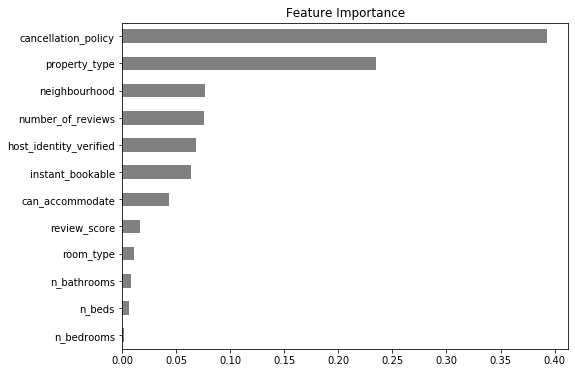

In [54]:
# Get feature importances
rf = pipeline.named_steps['randomforestregressor']
importances = pd.Series(rf.feature_importances_, X_train.columns)

# Plot feature importances
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.title('Feature Importance')
importances.sort_values().plot.barh(color='grey');

In [55]:
#try to graph it out
import plotly.express as px
px.scatter(Berlin, x='neighbourhood', y= target)
#this shows pricey neighbourhoods from left to right

In [56]:
#try to graph it out
import plotly.express as px
px.scatter(Berlin, x='number_of_reviews', y= target)
#this shows the less reviews, the higher the price (this probably suggests that highly priced properties don't get booked much)

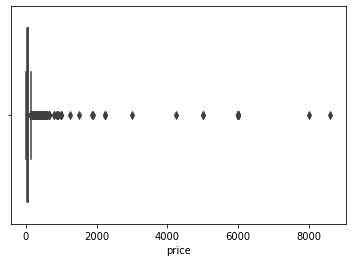

In [57]:
#try to graph it out
import seaborn as sns
sns.boxplot(y_train)

In [0]:
#throw some shapley values
# !pip install shap
# import shap

# X_train_encoded = encoder.transform(X_train)
# row = X_train_encoded

# explainer = shap.TreeExplainer(rf)
# shap_values = explainer.shap_values(row)

# shap.initjs()
# shap.force_plot(
# # shap.summary_plot( 
#     base_value=explainer.expected_value,
#     shap_values=shap_values,
#     features=row
# )

In [61]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler

# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

ValueError: ignored

In [53]:
# Arrange data into X features matrix and y target vector
target = 'price'

!pip install --upgrade category_encoders
import category_encoders as ce
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

pipeline = make_pipeline(
    ce.OrdinalEncoder(), 
    # SimpleImputer(strategy='median'), 
    RandomForestRegressor(n_estimators=250, random_state=42, n_jobs=-1)
)

# Fit on train, score on test
pipeline.fit(X_train, y_train)
y_pred_train = pipeline.predict(X_train)
y_pred_test = pipeline.predict(X_test)

rf = pipeline.named_steps['randomforestregressor']
encoder = pipeline.named_steps['ordinalencoder']


# Print Results
print('Training R^2', pipeline.score(X_train, y_train))
print(f'Training MAE: {mean_absolute_error(y_train, y_pred_train)} dollars')
print('Validation R^2', pipeline.score(X_test, y_test))
print(f'Validation MAE: {mean_absolute_error(y_test, y_pred_test)} dollars')

Requirement already up-to-date: category_encoders in /usr/local/lib/python3.6/dist-packages (2.1.0)
Training R^2 0.8953052565208769
Training MAE: 12.802253253627166 dollars
Validation R^2 0.7455879926090636
Validation MAE: 26.908308009532522 dollars


In [72]:
X_test.head(4)

,property_type,room_type,number_of_reviews,instant_bookable,cancellation_policy,neighbourhood,host_identity_verified,can_accommodate,n_bedrooms,n_bathrooms,n_beds,review_score
15595,Apartment,Private room,4,1,flexible,Neukölln,0.0,3,1,1,2+,10.0
19595,Apartment,Entire home/apt,1,0,flexible,Wedding,0.0,2,2+,1,1,10.0
5224,Apartment,Entire home/apt,0,0,flexible,Schöneberg,0.0,2,1,1,1,0.0
365,Apartment,Private room,1,0,moderate,Neukölln,1.0,2,2+,2+,1,10.0


In [71]:

#I think this is predicting the first 4 rows prices? so, $32, $31, $113.9, $67 ?
#Can someone verify this? :)
y_pred = pipeline.predict(X_test[:3])
y_pred

array([ 32.31      , 113.94873351,  67.81246447])

In [75]:
#looking up the first 4 prices of y
y_test.head(4)
#So wait - I thought this was a 1 dimensional array
#what is the number on the left? on the right it's the price correct?

15595     33
19595    150
5224      45
365       30
Name: price, dtype: int64